# check output files

In [2]:
import numpy as np
import numpy.matlib
import numpy.ma as ma

import xarray as xr
xr.set_options(enable_cftimeindex=True)

import time
import cftime
import netCDF4 as nc
from datetime import timedelta

import pandas as pd

#import xcdat

import matplotlib as mpl
import matplotlib.pyplot as plt

#import cartopy.crs as ccrs
#from cartopy.util import add_cyclic_point

import glob


## notes on packages to add to this kernel
import nc_time_axis
import cartopy.crs as ccrs
import cartopy

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/xarray/core/options.py:115: FutureWarning: The enable_cftimeindex option is now a no-op and will be removed in a future version of xarray.
  warnings.warn(


 float m01s19i013(pseudo_level, latitude, longitude) ;    =  Surface type fractions

                int latitude_longitude ;
                int pseudo_level(pseudo_level) ;
                float latitude(latitude) ;
                float longitude(longitude) ;
                double forecast_period ;
                double forecast_period_bnds(bnds) ;
                double forecast_reference_time ;
                double time ;
                double time_bnds(bnds) ;
                float m01s19i042(latitude, longitude) ;    LANDUSE CO2 FLUX TO ATM    KGC/M2/YR
                float m01s19i044(latitude, longitude) ;    HARVEST C (GBM) KGC/M2/360d
                float m01s19i053(latitude, longitude) ;    SOIL TO ATMOS RESP FLUX  KGC/M2/YR
                float m01s19i102(latitude, longitude) ;    NPP POST N-LIMIT (GBM) KGC/M2/YR
                float m01s30i464(latitude_0, longitude_0) ;   ATMOSPHERIC CO2 BURDEN IN GtC
                float latitude_0(latitude_0) ;
                float longitude_0(longitude_0) ;
                float m01s30i466(latitude_0, longitude_0) ;    CO2 CONCENTRATION (ppmv)
                float m01s00i250(latitude, longitude) ;       CO2 OCEAN FLUX             KG/M**2/S
                float air_temperature(latitude, longitude) ;
                double height ;
                float air_temperature_0(latitude, longitude) ;
                float air_temperature_1(dim0, latitude, longitude) ;
                double forecast_period_0(dim0) ;
                double forecast_period_0_bnds(dim0, bnds) ;
                double time_0(dim0) ;
                double time_0_bnds(dim0, bnds) ;
                float soil_carbon_content(latitude, longitude) ;
                float toa_outgoing_longwave_flux(latitude, longitude) ;
                float toa_outgoing_longwave_flux_0(dim0, latitude, longitude) ;
                float toa_outgoing_shortwave_flux(latitude, longitude) ;
                float toa_outgoing_shortwave_flux_0(dim0, latitude, longitude) ;
                float vegetation_carbon_content(latitude, longitude) ;

In [3]:
outputdir= '/glade/campaign/cgd/tss/people/aswann/flat10/'
filenamepath = outputdir +'/testing/' +'dh493a.py21711201.nc'

In [12]:
ds_r = dsmerge_f = xr.open_dataset(filenamepath, use_cftime=True, mask_and_scale=True)


In [13]:
#ds_masked = ds_r.where(ds_r >1e35)  

In [14]:
ds_r

<xarray.Dataset>
Dimensions:                        (pseudo_level: 37, latitude: 144,
                                    longitude: 192, bnds: 2, latitude_0: 1,
                                    longitude_0: 1, dim0: 8)
Coordinates:
  * pseudo_level                   (pseudo_level) int32 3 4 6 7 ... 933 934 935
  * latitude                       (latitude) float32 -89.38 -88.12 ... 89.38
  * longitude                      (longitude) float32 0.9375 2.812 ... 359.1
    forecast_period                timedelta64[ns] ...
    forecast_reference_time        object ...
    time                           object ...
  * latitude_0                     (latitude_0) float32 89.38
  * longitude_0                    (longitude_0) float32 359.1
    height                         float64 ...
    forecast_period_0              (dim0) timedelta64[ns] ...
    time_0                         (dim0) object ...
Dimensions without coordinates: bnds, dim0
Data variables: (12/22)
    m01s19i013                     (pseudo_level, latitude, longitude) float32 ...
    latitude_longitude             int32 ...
    forecast_period_bnds           (bnds) float64 ...
    time_bnds                      (bnds) object ...
    m01s19i042                     (latitude, longitude) float32 ...
    m01s19i044                     (latitude, longitude) float32 ...
    ...                             ...
    soil_carbon_content            (latitude, longitude) float32 ...
    toa_outgoing_longwave_flux     (latitude, longitude) float32 ...
    toa_outgoing_longwave_flux_0   (dim0, latitude, longitude) float32 ...
    toa_outgoing_shortwave_flux    (latitude, longitude) float32 ...
    toa_outgoing_shortwave_flux_0  (dim0, latitude, longitude) float32 ...
    vegetation_carbon_content      (latitude, longitude) float32 ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   12.1
    Conventions:  CF-1.7

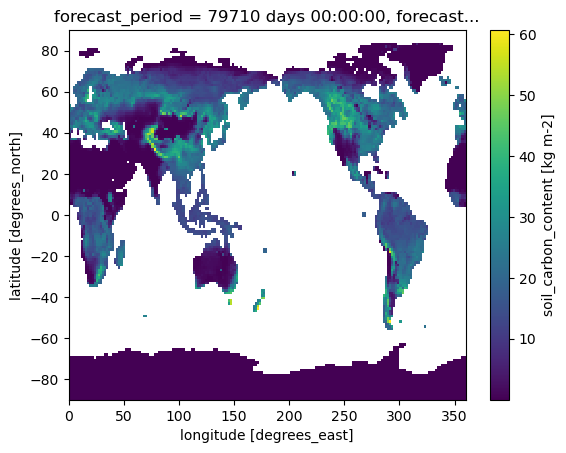

In [17]:
ds_r.soil_carbon_content.where(ds_r.soil_carbon_content <1e35) .plot()

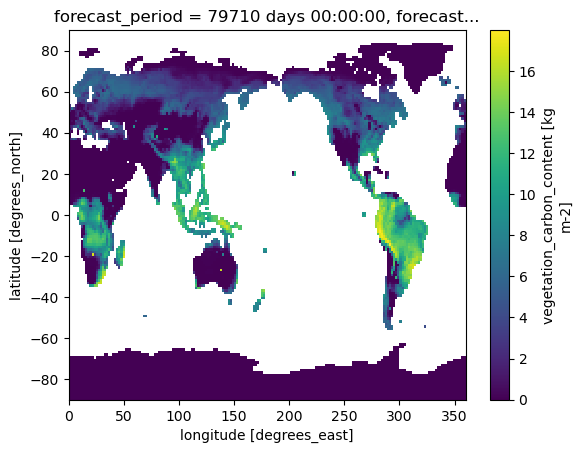

In [18]:
ds_r.vegetation_carbon_content.where(ds_r.soil_carbon_content <1e35) .plot()